In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("medicine.csv")

In [4]:
df.head()

,Age,Sugar,BP,Medicine
0,5,LOW,NORMAL,A
1,7,NORMAL,NORMAL,A
2,10,NORMAL,lOW,B
3,12,NORMAL,HIGH,B
4,13,HIGH,NORMAL,B


In [5]:
y = df["Medicine"]

In [6]:
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_Sugar = LabelEncoder()

In [7]:
X = pd.DataFrame(columns=['nBP','nSugar','Age'])

In [8]:
X

,nBP,nSugar,Age


In [9]:
X["nBP"] = le_BP.fit_transform(df["BP"])
X["nSugar"] = le_Sugar.fit_transform(df["Sugar"])
X["Age"] = df["Age"]

In [10]:
X

,nBP,nSugar,Age
0,1,1,5
1,1,2,7
2,2,2,10
3,0,2,12
4,1,0,13
5,1,2,18
6,1,2,22
7,1,2,24
8,1,2,27
9,1,2,34


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.4)

In [12]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
classifier = DecisionTreeClassifier() 

In [13]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [14]:
xtest

,nBP,nSugar,Age
14,1,2,59
10,1,2,32
8,1,2,27
16,1,2,62
5,1,2,18
12,0,2,40
6,1,2,22


In [15]:
ytest

14    A
10    A
8     A
16    A
5     A
12    B
6     A
Name: Medicine, dtype: object

In [16]:
classifier.predict(xtest)

array(['A', 'A', 'A', 'A', 'A', 'B', 'A'], dtype=object)

In [17]:
classifier.score(xtest,ytest)

1.0

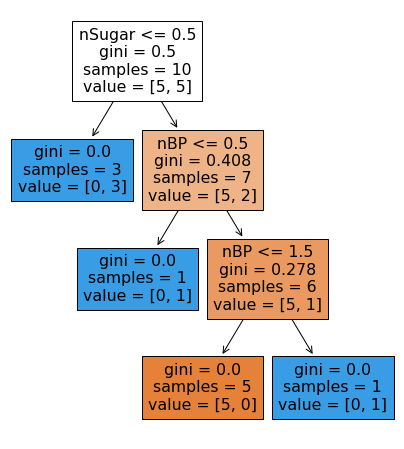

In [18]:
plt.figure(figsize=(7,8))
plot_tree(classifier,filled=True,feature_names=X.columns)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(ytest,classifier.predict(xtest))

In [20]:
cm

array([[6, 0],
       [0, 1]], dtype=int64)

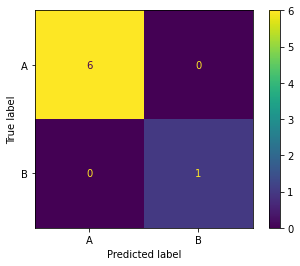

In [21]:
plot_confusion_matrix(classifier,xtest,ytest)

## Random forest

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=4)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
Rclassifier = RandomForestClassifier()

In [26]:
Rclassifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [27]:
xtest

,nBP,nSugar,Age
13,1,0,51
3,0,2,12
1,1,2,7
11,1,2,36


In [28]:
ytest

13    B
3     B
1     A
11    A
Name: Medicine, dtype: object

In [29]:
Rclassifier.predict(xtest)

array(['B', 'B', 'A', 'A'], dtype=object)

In [30]:
Rclassifier.score(xtest,ytest)

1.0

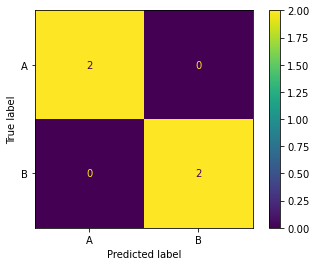

In [31]:
plot_confusion_matrix(Rclassifier,xtest,ytest)